# ---------------------------Navy Underwater Mine Identifier---------------------------------------

This programs analyzes the strength of sonar signal reflected by an underwater obstacle and finds out if its a rock or an underwater mine. This will help submarines to divert the path if an underwater mine is detected and reach safely to the destination.

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [20]:
#step 1-Read data
def read_dataset():
    df=pd.read_csv(r'C:\Users\Preeti Saraswat\Documents\Naval mine detector-project tf\Sonar dataset.csv',delimiter=',')
    #SonarSignal.head()
    #SonarSignal.info()
    X=df[df.columns[0:60]].values
    y=df[df.columns[60]]
    
#step 2-Encode The Dependent Variable
    encoder=LabelEncoder()
    encoder.fit(y)
    y=encoder.transform(y)
    Y=one_hot_encode(y)
    print (X.shape)
    return (X,Y)

In [21]:
#define encoder function
def one_hot_encode(labels):
    n_labels=len(labels)
    n_unique_labels=len(np.unique(labels))
    one_hot_encode=np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels),labels]=1
    return one_hot_encode

In [22]:
#read Dataset
X,Y=read_dataset()

(208, 60)


In [23]:
X,Y=shuffle(X,Y, random_state=1)

In [24]:
#split dataset into train and test
train_x, test_x, train_y, test_y= train_test_split(X,Y,test_size=0.20,random_state=415)

In [25]:
#define parameters:
learning_rate=0.3
training_epochs=1000
cost_history=np.empty(shape=[1], dtype=float)
n_dim=X.shape[1]
print('ndim',n_dim)
n_class=2
model_path=r'C:\Users\Preeti Saraswat\Desktop\model'

ndim 60


In [26]:
#define no. of hidden layers and neurons in each layer
n_hidden1=60
n_hidden2=60
n_hidden3=60
n_hidden4=60

In [27]:
x=tf.placeholder(tf.float32,[None,n_dim])
w=tf.Variable(tf.zeros([n_dim,n_class]))
b=tf.Variable(tf.zeros([n_class]))
y_=tf.placeholder(tf.float32,[None,n_class])

In [28]:
#define model
def  multilayer_perceptron(x,weights,biases):
     #hidden layer with Relu activation
    layer1=tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer1=tf.nn.sigmoid(layer1)
    
    layer2=tf.add(tf.matmul(layer1,weights['h2']),biases['b2'])
    layer2=tf.nn.sigmoid(layer2)
    
    layer3=tf.add(tf.matmul(layer2,weights['h3']),biases['b3'])
    layer3=tf.nn.sigmoid(layer3)
    
    layer4=tf.add(tf.matmul(layer3,weights['h4']),biases['b4'])
    layer4=tf.nn.relu(layer4)
    
    #output layer with linear activation
    out_layer=tf.add(tf.matmul(layer4,weights['out']),biases['out'])
    return out_layer

In [29]:
#define weights and biases
weights= {
    'h1': tf.Variable(tf.random_normal(([n_dim,n_hidden1]))),
    'h2': tf.Variable(tf.random_normal([n_hidden1,n_hidden2])),
    'h3': tf.Variable(tf.random_normal([n_hidden2,n_hidden3])),
    'h4': tf.Variable(tf.random_normal([n_hidden3,n_hidden4])),
    'out': tf.Variable(tf.random_normal([n_hidden4,n_class]))
}
biases= {
    'b1': tf.Variable(tf.random_normal([n_hidden1])),
    'b2': tf.Variable(tf.random_normal([n_hidden2])),
    'b3': tf.Variable(tf.random_normal([n_hidden3])),
    'b4': tf.Variable(tf.random_normal([n_hidden4])),
    'out': tf.Variable(tf.random_normal([n_class]))
}

In [30]:
init = tf.global_variables_initializer()
saver=tf.train.Saver()
#call your model
y = multilayer_perceptron(x, weights, biases)
#define cost function and optimiser
cost_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y,labels=y_))
training_step=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess=tf.Session()
sess.run(init)

#calculate error and accuracy at each itiration
mse_history=[]
accuracy_history=[]

for epochs in range(training_epochs) :
    sess.run(training_step,feed_dict={x:train_x,y_:train_y})
    cost=sess.run(cost_function,feed_dict={x:train_x,y_:train_y})
    cost_history=np.append(cost_history,cost)
    correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
    accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    pred_y=sess.run(y,feed_dict={x:test_x})
    mse=tf.reduce_mean(tf.square(pred_y-test_y))
    mse1=sess.run(mse)
    mse_history.append(mse1)
    accuracy=(sess.run(accuracy,feed_dict={x:train_x,y_:train_y}))
    accuracy_history.append(accuracy)
    if epochs%100 == 0:
        print('epoch:', epochs, '---','cost:', cost, 'loss:',mse1, 'train accuracy', accuracy)

epoch: 0 --- cost: 146.21043 loss: 26122.758079784813 train accuracy 0.5481928
epoch: 100 --- cost: 0.588737 loss: 5.841121580060649 train accuracy 0.7289157
epoch: 200 --- cost: 0.53942347 loss: 5.411292507219587 train accuracy 0.686747
epoch: 300 --- cost: 0.8061879 loss: 6.279695995191192 train accuracy 0.5481928
epoch: 400 --- cost: 0.32842994 loss: 5.712145684253129 train accuracy 0.8493976
epoch: 500 --- cost: 0.27034178 loss: 6.519770253835389 train accuracy 0.8915663
epoch: 600 --- cost: 0.26679838 loss: 4.717081356207272 train accuracy 0.9096386
epoch: 700 --- cost: 0.14567019 loss: 5.991885001547665 train accuracy 0.94578314
epoch: 800 --- cost: 0.42822543 loss: 4.27409031928273 train accuracy 0.76506025
epoch: 900 --- cost: 0.3527108 loss: 8.129368865186652 train accuracy 0.8614458


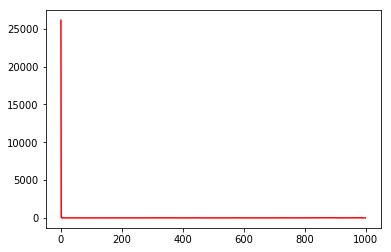

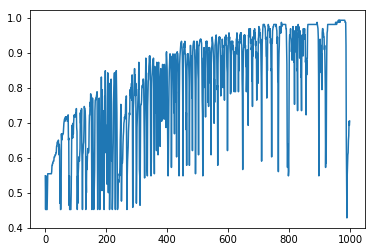

test accuracy 0.61904764
MSE


In [31]:
#plot mse and accuracy graph
plt.plot(mse_history,'r')
plt.show()
plt.plot(accuracy_history)
plt.show()

#print final accuracy
correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print('test accuracy',(sess.run(accuracy,feed_dict={x:test_x,y_:test_y})))

#final mean square error:
pred_y=sess.run(y,feed_dict={x:test_x})
mse=tf.reduce_mean(tf.square(pred_y-test_y))
print('MSE' %sess.run(mse))